In [1]:
#This program allow to modify the solved coefficient, by default in a 10%,
# in order to prove the functioning and reliability of the 
# matching algorith.


import glob
import os
import csv
from scipy.interpolate import interp1d
import numpy as np
import pylab
from scipy.integrate import fixed_quad
from __future__ import division
import pickle

#MATERIALS
#Extract the files .CSV in the home archive that supposely are the spectrum information 
#of the materials

# create the list of files
materials = glob.glob('materials/*'); 
num_mat=len(materials);

mat_int=[];           #store the intensities of the materials csv files
mat_wl=[];            #store the wavelenght of the materials csv files
name_material=[];     #names of the files where the material's spectrum are

i_mat=0;
for x in materials:
    material=open(x,'rU');
    name_mat=os.path.basename(x).replace('.CSV','');
    name_material.append(name_mat);
    csv_material=csv.reader(material);
    mat_int.append([]);
    mat_wl.append([]);
    for row in csv_material:
        mat_wl[i_mat].append(float(row[0]));
        mat_int[i_mat].append(float(row[1]));
    i_mat+=1;
    material.close();
    
#make continuous the intensity_mat function
f_mat=range(num_mat);
f_mat[:]=[[] for x in f_mat];
for i in range(num_mat):
    f_mat[i]=interp1d(mat_wl[i],mat_int[i]);

#Sensor's radiometry
    
#open the csv file in pyhton
responses = glob.glob('responses/*');
num_responses=len(responses);
name_responses=[];
coef_sat=[];
for i in range(num_responses):
    coef_sat.append([]);
i_sat=0;

for x in responses:
    resp=open(x,'rU');
    csv_response=csv.reader(resp);
    name_resp=os.path.basename(x).replace('.csv','');
    name_responses.append(name_resp);
    name_bands=[];
    #Value used to read the titles or first lines of the satellites' spectrums
    safe=0;
    #put the sensor's information in lists
    wavelenght=[];
    for row in csv_response:
        if safe==0:
            #Here assign the name of the bands as well as the number of bands
            num_bands=len(row)-1;
            for i in range(num_bands):
                name_bands.append(row[i+1]);
            band=range(num_bands);
            for k in band:
                band[k]=[];
            safe=1;
        else:
            wavelenght.append(float(row[0]));
            for i in range(num_bands):
                band[i].append(float(row[i+1]));  

    #should i to close the file
    resp.close();
 
    #Make continuous the sensors' spectrum
    f_sen=range(num_bands);
    for i in range(num_bands):
        f_sen[i]=interp1d(wavelenght,band[i]);

        
    # COEFFICIENTS

    coef=np.zeros((num_mat,num_bands));
    result=range(num_bands);
    #integrate to obtain the coefficients for every material in every band
    for i in range(num_mat):   #count over the materials' spectrum
        for j in range(num_bands):    #count over the satellites bands
            xmin=max(min(wavelenght),min(mat_wl[i]));
            xmax=min(max(wavelenght),max(mat_wl[i]));
        
            #Find the range of integration and write it down in the answer
        
            Result=fixed_quad(lambda x:f_sen[j](x)*f_mat[i](x),xmin,xmax,n=4000);
            coef[i,j]=float(Result[0]); 
        coef_max=max(coef[i,:]);
        coef[i,:]/=coef_max;
        #list to store the whole coefficients coef_sat
        coef_sat[i_sat].append(coef[i,:]);
   
    i_sat+=1;
    #Need to store every coef in the folder coefficients
    
    #MUST i to add a new field to every coef, the name to be identified

print coef_sat[1];

[array([ 0.        ,  0.        ,  0.        ,  0.03222676,  0.02964744,
        0.04912454,  0.09501298,  0.15011473,  0.03238998,  0.01553812,
        0.52076138,  1.        ,  0.33835575]), array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.42619971,
        0.30300461,  0.17200161,  0.25785258,  0.01928254,  0.0234902 ,
        0.14898115,  0.36578436,  0.02805991]), array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.46961863,
        0.33101909,  0.1918086 ,  0.5698597 ,  0.08239834,  0.21034515,
        0.13896723,  0.26621559,  0.05181653]), array([ 0.        ,  0.        ,  0.        ,  0.32335718,  0.24243535,
        0.08704   ,  0.04212974,  0.40037191,  0.08216   ,  0.28430554,
        0.64245045,  1.        ,  0.12148566]), array([ 0.        ,  0.        ,  0.        ,  0.29341361,  0.15303758,
        0.08059319,  0.07013298,  0.418843  ,  0.11073528,  0.26822525,
        0.47256322,  1.        ,  0.11904989]), array([ 0.        ,  0.        ,  0.   

In [31]:
#This allow to



import random
# by now dec/2016, what could be choosen are:
# choose "i" as the satellite, already they are 0='re', 1='s2A', 2='wv3'
i_sat=1;
# choose "j" as the number of the material, 
# there are 19 options, from 0 to 18
j=11;
spec=coef_sat[i_sat][j];
bands=len(spec);

for i in range(bands):
    spec[i]=spec[i]*random.uniform(0.95,1.05);

unknown=spec;
import csv
with open('unknown/changed_'+name_material[j]+'.'+name_responses[i_sat]+'.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile);
    spamwriter.writerow(unknown);
    csvfile.close();
print 'unknown/changed_'+name_material[j]+'.'+name_responses[i_sat]+'.csv';
print unknown;

unknown/changed_3.2.s2A.csv
[ 0.          0.          0.          0.12820304  0.15370686  0.07319496
  0.07474961  0.4128548   0.08544962  0.08108235  0.76413311  1.04722133
  0.12647975]


In [56]:
print 7

7


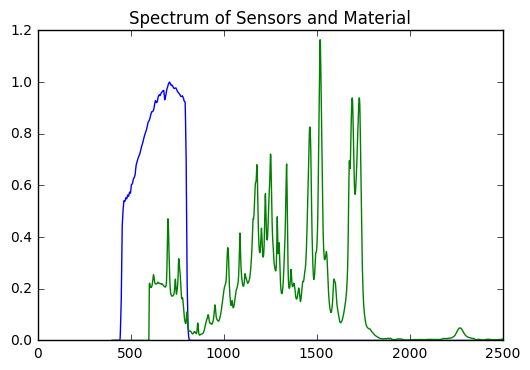

In [58]:
#This program is to study any spectral register. Should be feeded  the
#specific satellite to be analysed.


import glob
import os
import csv
from scipy.interpolate import interp1d
import numpy as np
import pylab
from scipy.integrate import fixed_quad
from __future__ import division
import pickle

#MATERIALS
#Extract the files .CSV in the home archive that supposely are the spectrum information 
#of the materials

# create the list of files
materials = glob.glob('materials/*'); 
num_mat=len(materials);

mat_int=[];           #store the intensities of the materials csv files
mat_wl=[];            #store the wavelenght of the materials csv files
name_material=[];     #names of the files where the material's spectrum are

i_mat=0;
for x in materials:
    material=open(x,'rU');
    name_mat=os.path.basename(x).replace('.CSV','');
    name_material.append(name_mat);
    csv_material=csv.reader(material);
    mat_int.append([]);
    mat_wl.append([]);
    for row in csv_material:
        mat_wl[i_mat].append(float(row[0]));
        mat_int[i_mat].append(float(row[1]));
    i_mat+=1;
    material.close();
    
#make continuous the intensity_mat function
f_mat=range(num_mat);
f_mat[:]=[[] for x in f_mat];
for i in range(num_mat):
    f_mat[i]=interp1d(mat_wl[i],mat_int[i]);

#Sensor's radiometry
    
#open the csv file in pyhton

#IN THIS LINE IT IS WRITEN THE DESIRED SATELLITE!!!


responses = glob.glob('responses/s2A');
num_responses=len(responses);
name_responses=[];
coef_sat=[];
for i in range(num_responses):
    coef_sat.append([]);
i_sat=0;

for x in responses:
    resp=open(x,'rU');
    csv_response=csv.reader(resp);
    name_resp=os.path.basename(x).replace('.csv','');
    name_responses.append(name_resp);
    name_bands=[];
    #Value used to read the titles or first lines of the satellites' spectrums
    safe=0;
    #put the sensor's information in lists
    wavelenght=[];
    for row in csv_response:
        if safe==0:
            #Here assign the name of the bands as well as the number of bands
            num_bands=len(row)-1;
            for i in range(num_bands):
                name_bands.append(row[i+1]);
            band=range(num_bands);
            for k in band:
                band[k]=[];
            safe=1;
        else:
            wavelenght.append(float(row[0]));
            for i in range(num_bands):
                band[i].append(float(row[i+1]));  

    #should i to close the file
    resp.close();
 
    #Make continuous the sensors' spectrum
    f_sen=range(num_bands);
    for i in range(num_bands):
        f_sen[i]=interp1d(wavelenght,band[i]);

        
    # COEFFICIENTS

    coef=np.zeros((num_mat,num_bands));
    result=range(num_bands);
    #integrate to obtain the coefficients for every material in every band
    for i in range(num_mat):   #count over the materials' spectrum
        for j in range(num_bands):    #count over the satellites bands
            xmin=max(min(wavelenght),min(mat_wl[i]));
            xmax=min(max(wavelenght),max(mat_wl[i]));
        
            #Find the range of integration and write it down in the answer
        
            Result=fixed_quad(lambda x:f_sen[j](x)*f_mat[i](x),xmin,xmax,n=400);
            coef[i,j]=float(Result[0]); 
        coef_max=max(coef[i,:]);
        coef[i,:]/=coef_max;
        #list to store the whole coefficients coef_sat
        coef_sat[i_sat].append(coef[i,:]);
   
    i_sat+=1;
    #Need to store every coef in the folder coefficients

    print coef[i,:];
    
    #MUST i to add a new field to every coef, the name to be identified

    #Make the figure
xnew=np.linspace(400,2500,num=10000);
for i in range(1):
    pylab.plot(xnew,f_sen[i](xnew));

#for i in range(1):
 #   pylab.plot(xnew,f_mat[i](xnew));
pylab.plot(xnew,f_mat[12](xnew));
pylab.title("Spectrum of Sensors and Material");
pylab.legend(loc='lower right');

pylab.show()


In [5]:
print coef

[[  1.72914040e-01   1.31891962e-06   2.71687470e-06   2.25298253e-07
    2.22121314e-05   1.63031811e-02   3.95275538e-02   7.53952359e-02
    6.29687220e-02   2.88929368e-01   1.67559922e-01   4.34303156e-01
    1.00000000e+00   5.02221371e-03   1.03636503e-02   8.42970956e-02
    2.66981967e-02]
 [  1.00000000e+00   2.22121660e-06   2.40628081e-06   1.50168862e-06
    5.61345985e-05   4.00514204e-01   2.91279980e-01   1.11444533e-01
    4.17235887e-02   1.14603979e-01   5.58928596e-02   8.58279895e-02
    3.69578342e-01   1.27633138e-03   1.90748106e-03   2.74979376e-03
    1.77422720e-03]
 [  1.00000000e+00   3.40931539e-06   5.15120933e-06   1.74873288e-05
    1.49692504e-01   3.88880543e-01   2.05025962e-01   1.32686372e-01
    1.36808616e-01   9.33453719e-02   1.68611365e-02   2.35889438e-02
    9.73919473e-02   2.35195557e-03   2.75688230e-03   2.80615823e-03
    3.04751063e-03]
 [  1.00000000e+00   4.58368476e-06   1.04137788e-05   3.65109878e-05
    4.01652803e-01   3.5400609